In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
opportunities = pd.read_csv("Entrenamieto_ECI_2020.csv")

In [3]:
sources = opportunities.groupby("Opportunity_ID").agg({"Source":"unique"})
sources["Total"] = sources["Source"].apply(lambda x: len(x))
sources = sources[sources["Total"] != 1]
sources
# VEO QUE TODAS LAS OPORTUNITIES TENGAN UN SOLO Source

,Source,Total
Opportunity_ID,,


# Voy a ver la cantidad de veces que aparece cada Source

In [4]:
opportunities.drop_duplicates(subset="Opportunity_ID", inplace=True) #Hago esto porque algunas oportunidades tienen mas de una entrada
sources = opportunities.groupby("Source").agg({"Opportunity_ID":"count"}).sort_values(by="Opportunity_ID").reset_index() #Cuantas veces aparece cada source
sources["Source"] = sources["Source"].apply(lambda x: x.replace("Source_","")) #Saco Source_ de los nombres porque rompe los ejes
sources.rename(columns={"Opportunity_ID":"Cantidad"},inplace=True)
sources

,Source,Cantidad
0,5,1
1,12,2
2,0,4
3,6,17
4,4,32
5,2,68
6,1,88
7,10,89
8,3,305
9,13,536


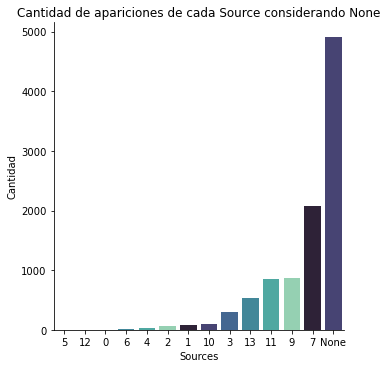

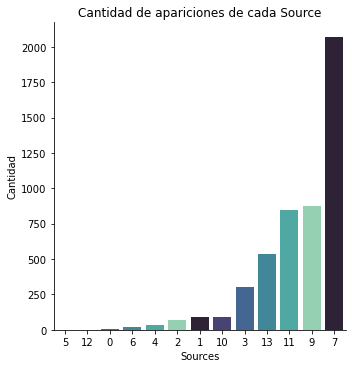

In [5]:
fig1 = sns.catplot(y="Cantidad", x="Source",data=sources,kind="bar",color="blue"\
           ,palette=sns.color_palette("mako")) #Cuantas veces aparece cada fuente
plt.savefig("img/Source/CantidadSource.png")
plt.xlabel("Sources")
plt.ylabel("Cantidad")
plt.title("Cantidad de apariciones de cada Source considerando None")
plt.show(fig1)

sources = sources[sources["Source"] != "None"]
fig2 = sns.catplot(y="Cantidad", x="Source",data=sources,kind="bar",color="blue",order=sources["Source"]\
           ,palette=sns.color_palette("mako")) #Cuantas veces aparece cada fuente sin contar None
plt.savefig("img/Source/CantidadSourceSinNone.png")
plt.xlabel("Sources")
plt.ylabel("Cantidad")
plt.title("Cantidad de apariciones de cada Source")
plt.show(fig2)


# Voy a ver con que porcentaje cada Source termina en Closed Won

In [6]:
sourcesVsWon = opportunities.pivot_table(columns="Stage",index="Source",values="Opportunity_ID", aggfunc="count").fillna(0)
sourcesVsWon["Total"] = opportunities["Source"].value_counts()
sourcesVsWon = sourcesVsWon.reset_index()
sourcesVsWon["Source"] = sourcesVsWon["Source"].apply(lambda x: x.replace("Source_",""))
sourcesVsWon["Closed Won"] = sourcesVsWon["Closed Won"]/sourcesVsWon["Total"]
sourcesVsWon = sourcesVsWon.sort_values(by="Closed Won")
sourcesVsWon

Stage,Source,Closed Lost,Closed Won,Negotiation,Proposal,Qualification,Total
1,0,4.0,0.000000,0.0,0.0,0.0,4
5,12,2.0,0.000000,0.0,0.0,0.0,2
10,5,1.0,0.000000,0.0,0.0,0.0,1
11,6,12.0,0.294118,0.0,0.0,0.0,17
2,1,60.0,0.318182,0.0,0.0,0.0,88
3,10,58.0,0.348315,0.0,0.0,0.0,89
7,2,42.0,0.382353,0.0,0.0,0.0,68
12,7,1155.0,0.438859,2.0,3.0,1.0,2069
9,4,16.0,0.500000,0.0,0.0,0.0,32
0,None,2371.0,0.509776,7.0,21.0,8.0,4910


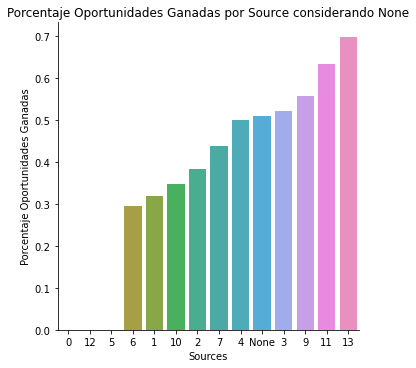

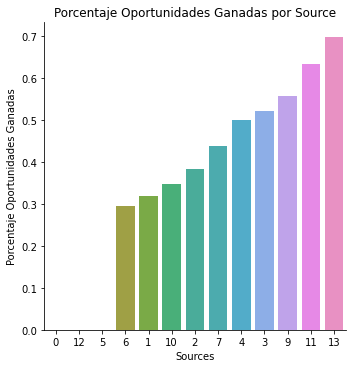

In [7]:
fig1 = sns.catplot(x="Source", y="Closed Won",kind="bar", data=sourcesVsWon)
plt.savefig("img/Source/PorcentajeClosedWonPorSource.png")
plt.xlabel("Sources")
plt.ylabel("Porcentaje Oportunidades Ganadas")
plt.title("Porcentaje Oportunidades Ganadas por Source considerando None")
plt.show(fig1)

sourcesVsWonWithoutNone = sourcesVsWon[sourcesVsWon["Source"] != "None"] #Saco los None
fig2 = sns.catplot(x="Source", y="Closed Won",kind="bar", data=sourcesVsWonWithoutNone,order=sourcesVsWonWithoutNone["Source"])
plt.savefig("img/Source/PorcentajeClosedWonPorSourceSinNone.png")
plt.xlabel("Sources")
plt.ylabel("Porcentaje Oportunidades Ganadas")
plt.title("Porcentaje Oportunidades Ganadas por Source")
plt.show(fig2)

# Filtro los que tienen menos de 100 entradas

In [8]:
sourcesVsWonFiltered = sourcesVsWon[sourcesVsWon["Total"]>100]
sourcesVsWonFiltered

Stage,Source,Closed Lost,Closed Won,Negotiation,Proposal,Qualification,Total
12,7,1155.0,0.438859,2.0,3.0,1.0,2069
0,None,2371.0,0.509776,7.0,21.0,8.0,4910
8,3,143.0,0.521311,0.0,3.0,0.0,305
13,9,385.0,0.556701,0.0,2.0,0.0,873
4,11,311.0,0.632822,0.0,0.0,0.0,847
6,13,159.0,0.697761,2.0,1.0,0.0,536


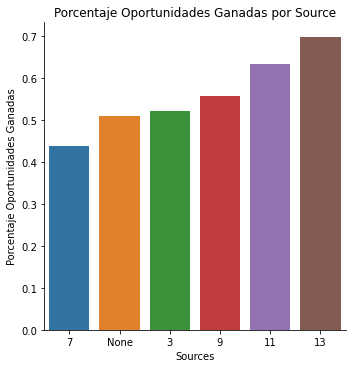

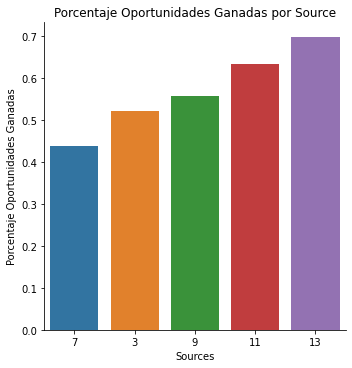

In [9]:
fig1 = sns.catplot(x="Source", y="Closed Won",kind="bar", data=sourcesVsWonFiltered)
plt.savefig("img/Source/PorcentajeClosedWonPorSourceMenosDe100.png")
plt.xlabel("Sources")
plt.ylabel("Porcentaje Oportunidades Ganadas")
plt.title("Porcentaje Oportunidades Ganadas por Source")
plt.show(fig1)

sourcesVsWonFilteredWithoutNone = sourcesVsWonFiltered.drop(axis=0, labels=0) #Saco los None
fig2 = sns.catplot(x="Source", y="Closed Won",kind="bar", data=sourcesVsWonFilteredWithoutNone,order=sourcesVsWonFilteredWithoutNone["Source"])
plt.savefig("img/Source/PorcentajeClosedWonPorSourceSinNoneMenosDe100.png")
plt.xlabel("Sources")
plt.ylabel("Porcentaje Oportunidades Ganadas")
plt.title("Porcentaje Oportunidades Ganadas por Source")
plt.show(fig2)

#VER EL TEMA DE LOS COLORES

# Veo como termina cada Source que tenga mas de 100 entradas

In [16]:
sourcesVsStage = opportunities.groupby(["Source","Stage"]).agg({"Opportunity_ID":"count"})#Consigo la cantidad de veces de cada Stage por cada source
sourcesVsStage = sourcesVsStage.reset_index()
sourcesVsStage["Source"] = sourcesVsStage["Source"].apply(lambda x: x.replace("Source_",""))
sourcesVsStage.rename(columns={"Opportunity_ID":"Cantidad"},inplace = True)
total = sourcesVsStage.groupby("Source").agg({"Cantidad":"sum"}) #La cantidad total de veces que aparece source
sourcesVsStage.set_index("Source",inplace=True)
sourcesVsStage["Total"] = total["Cantidad"]
sourcesVsStage = sourcesVsStage[sourcesVsStage["Total"]>100]#Filtro a los q tienen mas de 100 entradas
sourcesVsStage.reset_index(inplace=True)
sourcesVsStage = sourcesVsStage[(sourcesVsStage["Stage"]=="Closed Won") | (sourcesVsStage["Stage"]=="Closed Lost")]
sourcesVsStage

,Source,Stage,Cantidad,Total
0,None,Closed Lost,2371,4910
1,None,Closed Won,2503,4910
5,11,Closed Lost,311,847
6,11,Closed Won,536,847
7,13,Closed Lost,159,536
8,13,Closed Won,374,536
11,3,Closed Lost,143,305
12,3,Closed Won,159,305
14,7,Closed Lost,1155,2069
15,7,Closed Won,908,2069


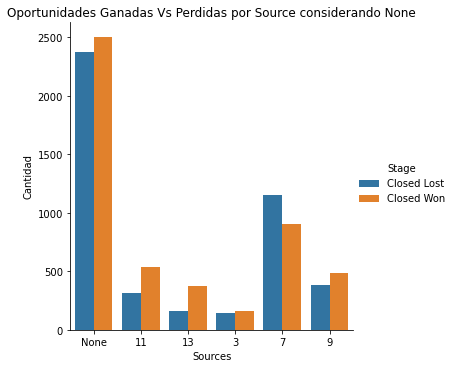

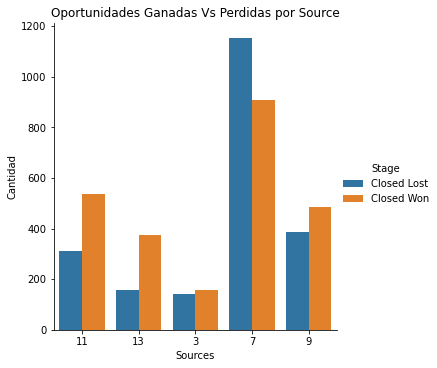

In [17]:
fig1 = sns.catplot(x="Source",y="Cantidad",hue="Stage",data=sourcesVsStage,kind="bar")
plt.savefig("img/Source/ClosedWonVsClosedLostPorSource.png")
plt.xlabel("Sources")
plt.ylabel("Cantidad")
plt.title("Oportunidades Ganadas Vs Perdidas por Source considerando None")
plt.show(fig1)

sourcesVsStage = sourcesVsStage[sourcesVsStage["Source"] != "None"]
fig2 = sns.catplot(x="Source",y="Cantidad",hue="Stage",data=sourcesVsStage,kind="bar")
plt.savefig("img/Source/ClosedWonVsClosedLostPorSourceSinNone.png")
plt.xlabel("Sources")
plt.ylabel("Cantidad")
plt.title("Oportunidades Ganadas Vs Perdidas por Source")
plt.show(fig2)


# Veo el ASP(En dolares) de cada source

In [12]:
#ASP(converted) es siempre USD
aspBySource = opportunities[["Source","ASP_(converted)","Opportunity_ID"]].groupby("Source").\
    agg({"ASP_(converted)":"mean","Opportunity_ID":"count"}).sort_values(by="ASP_(converted)")
aspBySource.reset_index(inplace=True)
aspBySource["Source"] = aspBySource["Source"].apply(lambda x: x.replace("Source_",""))
aspBySource.rename(columns={"ASP_(converted)":"ASP(USD)","Opportunity_ID":"Cantidad"},inplace=True)
aspBySource = aspBySource[aspBySource["Cantidad"]>100]
aspBySource = aspBySource[aspBySource["Source"] != "None"]
aspBySource = aspBySource.sort_values(by="ASP(USD)")
aspBySource

,Source,ASP(USD),Cantidad
3,9,0.417443,873
4,13,0.421584,536
5,7,0.424303,2069
6,11,0.428097,847
13,3,0.645817,305


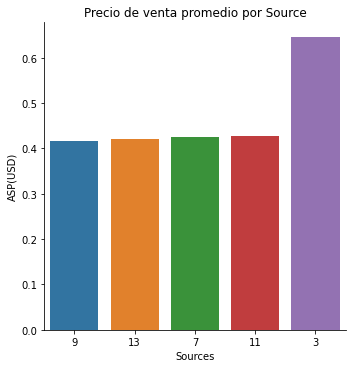

In [13]:
fig1 = sns.catplot(kind="bar",x="Source",y="ASP(USD)",data=aspBySource,order=aspBySource["Source"])
plt.savefig("img/Source/ASPPorSource.png")
plt.xlabel("Sources")
plt.ylabel("ASP(USD)")
plt.title("Precio de venta promedio por Source")
plt.show(fig1)

#Lo unico que puedo decir es que la source 3 tiene un precio considerablemente mas alto que las otras

# Source vs TRF

In [14]:
sourceVsTRF = opportunities[["Source","TRF","Opportunity_ID"]].groupby("Source").agg({"TRF":"mean","Opportunity_ID":"count"})
sourceVsTRF = sourceVsTRF[(sourceVsTRF["TRF"] > 0) & (sourceVsTRF["Opportunity_ID"]>100)]
sourceVsTRF.reset_index(inplace=True)
sourceVsTRF = sourceVsTRF[sourceVsTRF["Source"] != "None"]
sourceVsTRF["Source"] = sourceVsTRF["Source"].apply(lambda x: x.replace("Source_",""))
sourceVsTRF = sourceVsTRF.sort_values(by="TRF")
sourceVsTRF

,Source,TRF,Opportunity_ID
5,9,1.663230,873
2,13,2.242537,536
1,11,2.412043,847
3,3,2.750820,305
4,7,4.150314,2069


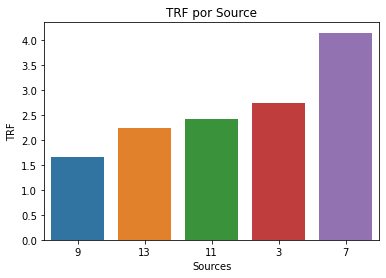

In [15]:
plot = sns.barplot(x="Source",y="TRF",data=sourceVsTRF, order=sourceVsTRF["Source"])
plt.savefig("img/Source/TRFPorSource.png")
plt.xlabel("Sources")
plt.ylabel("TRF")
plt.title("TRF por Source")
plt.show(fig1)